In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
  iris_data.data,
  iris_data.target,
  test_size=0.2,
  random_state=11
)

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(
        dt_clf,
        out_file = 'tree11.dot',
        class_names= iris_data.target_names,
        feature_names = iris_data.feature_names,
        impurity= True,
        filled= True)

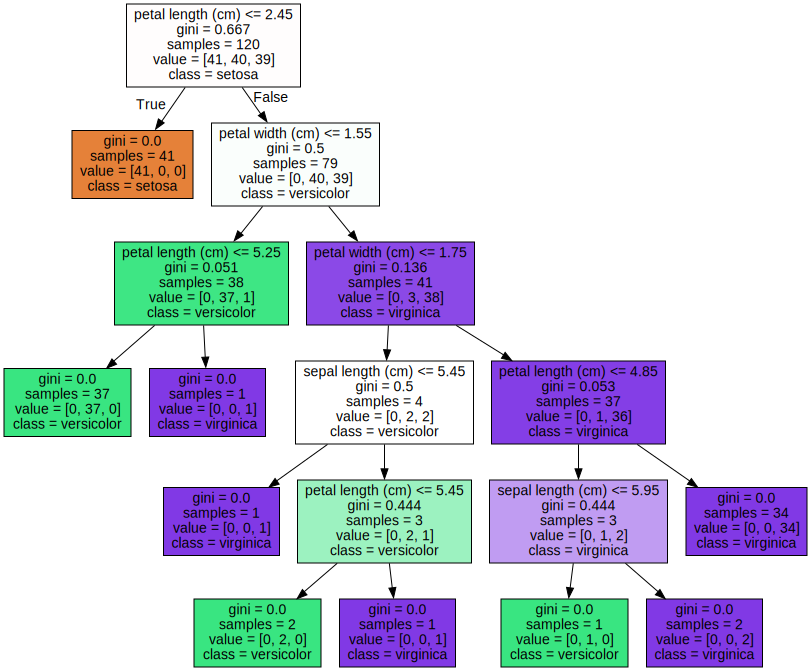

In [16]:
import graphviz

with open('tree11.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [23]:
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train)
test_pred = dt_clf.predict(X_test)

print('훈련 세트에 대한 점수: {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 세트에 대한 점수: {:.3f}'.format(accuracy_score(y_test, test_pred)))




훈련 세트에 대한 점수: 1.000
테스트 세트에 대한 점수: 0.933


In [26]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


<Axes: >

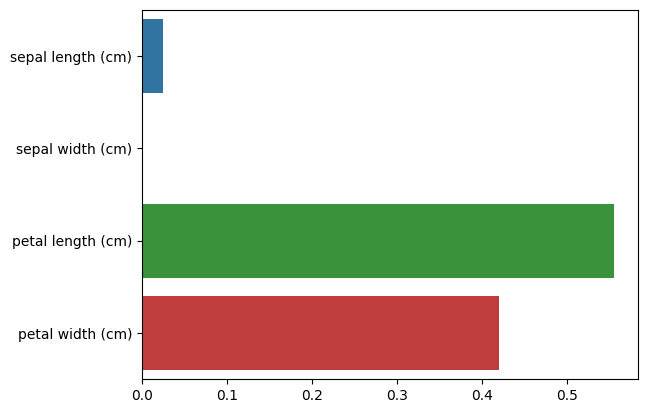

In [31]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

for name, value, in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(name, value)
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)